In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Adding Artificial Bloom

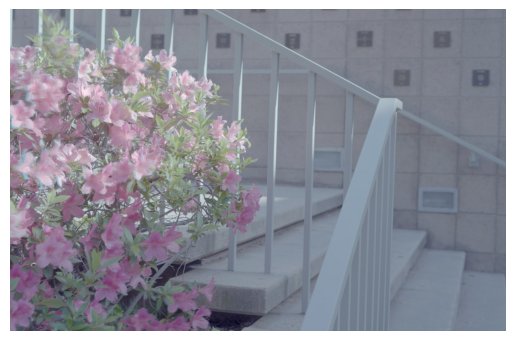

In [13]:
# Using the ldr output jpg
impath = "ldr_9.jpg"
img = cv.imread(impath, cv.IMREAD_COLOR_RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

The idea is to convert to 0-1 float values then make a "white" mask to isolate the colors deemed "white". Then scale those values up to simulate the bloom while the other values remain the same.

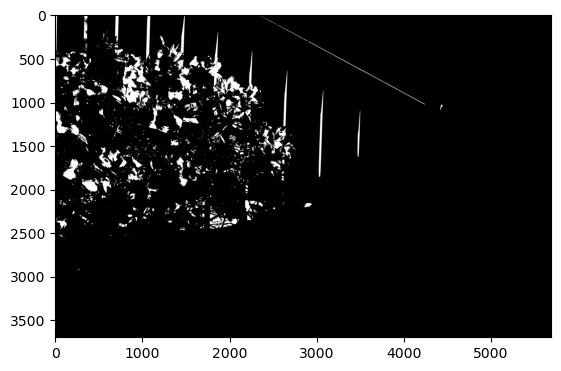

True

In [ ]:
# Load an image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.float64)

white_threshold=0.7
scale_factor=1.2
blur_strength=1

# Normalize the image to range [0, 1]
normalized_image = img / 255.0

# Define a threshold for "white" (close to 1 for all RGB channels)
white_mask = np.all(normalized_image > white_threshold, axis=-1)

# Visualize the white mask
plt.imshow(white_mask, cmap='gray')
plt.show()

# Scale up the "white" regions
bloom_mask = normalized_image * white_mask[..., np.newaxis] * scale_factor

# Apply Gaussian blur to simulate glow
bloom_mask = cv.GaussianBlur(bloom_mask, (blur_strength, blur_strength), 0)

# Merge the bloom effect with the original image
result = np.clip(normalized_image + bloom_mask, 0, 1)

# Convert back to 8-bit image
result = (result * 255).astype(np.uint8)

# Save image
cv.imwrite("bloomed_image.jpg", result)